### Mengimport modul yang dibutuhkan untuk preprocessing data image dan menampilkan data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
import shutil
import random
import re
from random import sample

### Membuat variabel untuk memanggil directory secara mudah

In [2]:
root_path = r'D:\Materi Kuliah\Semester 5\Praktikum\Praktikum_KB\PA_KEL\Datasets'
source_path = os.path.join(root_path, 'Images')
destination_path = os.path.join(root_path, 'Used')

### Mengecek banyaknya file pada folder yang terbagi menjadi 2 class

In [4]:
folders = {}

for folder in os.listdir(source_path):
    folders[folder] = len(os.listdir(os.path.join(source_path, folder)))
    
print(f'Terdapat 2 class pada folder Images yang berisi {folders}')

Terdapat 2 class pada folder Images yang berisi {'glasses': 2769, 'no_glasses': 2151}


### Membuat folder training dan validation

In [5]:
if os.path.isdir(os.path.join(destination_path, 'training')):
    print(f"path {os.path.join(destination_path, 'training')} Sudah Terbuat")
else:
    os.makedirs(os.path.join(destination_path, 'training'))
    for folder in folders.keys():
            os.mkdir(os.path.join(destination_path, f'training/{folder}'))
if os.path.isdir(os.path.join(destination_path, 'validation')):
    print(f"path {os.path.join(destination_path, 'validation')} Sudah Terbuat")
else:
    os.makedirs(os.path.join(destination_path, 'validation'))
    for folder in folders.keys():
            os.mkdir(os.path.join(destination_path, f'validation/{folder}'))

### Membuat variabel yang mengarahakan langsung ke directory training dan validation

In [6]:
train_dir = 'Datasets/Used/training'
val_dir = 'Datasets/Used/validation'

### Mengecek isi folder train

In [10]:
print(f'Folder Train memiliki 2 kelas yaitu {os.listdir(train_dir)}')

Folder Train memiliki 2 kelas yaitu ['glasses', 'no_glasses']


### Membuat variabel dengan isi list untuk memasukkan data kedalam folder

In [11]:
files_name = {
    "glasses":[],
    "no_glasses":[]
}
files_train = {
    "glasses":[],
    "no_glasses":[]
}
files_val = {
    "glasses":[],
    "no_glasses":[]
}

### Memasukkan data kedalam folder

In [12]:
for type in files_name.keys():
    for file in os.listdir(os.path.join(source_path, type)):
        if os.path.getsize(os.path.join(source_path, f'{type}/{file}')):
            files_name[type].append(file)
        else:
            print(f'{file} dilewatkan')

In [13]:
print(f"Jumlah file pada folder glasses {len(files_name['glasses'])}")

Jumlah file pada folder glasses 2769


### Membagi jumlah data dengan jumlah 80:20 untuk training dan validation lalu memasukkan data kedalam folder train dan validation

In [15]:
split_point = {
    "glasses":0,
    "no_glasses":0,
}

for key in split_point.keys():
    split_point[key] = int(len(files_name[key])*.2)

for key in files_train.keys():
    files_val[key].append(files_name[key][:split_point[key]])
    files_train[key].append(files_name[key][split_point[key]:])

for keys, values in files_train.items():
    print(f'Label {keys} Memiliki {len(values[0])} Gambar')
for keys, values in files_val.items():
    print(f'Label {keys} Memiliki {len(values[0])} Gambar')

Label glasses Memiliki 2216 Gambar
Label no_glasses Memiliki 1721 Gambar
Label glasses Memiliki 553 Gambar
Label no_glasses Memiliki 430 Gambar


### Melihat jumlah file yang ada pada folder train dan validation sesuai nama class/folder

In [19]:
print(f"Jumlah file pada folder train dengan class glasses {len(files_train['glasses'][0])}")
print(f"Jumlah file pada folder train dengan class no_glasses {len(files_train['no_glasses'][0])}")

print(f"Jumlah file pada folder val dengan class glasses {len(files_val['glasses'][0])}")
print(f"Jumlah file pada folder val dengan class no_glasses {len(files_val['no_glasses'][0])}")

Jumlah file pada folder train dengan class glasses 2216
Jumlah file pada folder train dengan class no_glasses 1721
Jumlah file pada folder val dengan class glasses 553
Jumlah file pada folder val dengan class no_glasses 430


### Mengcopy file dari sumber ke destination path

In [20]:
for type in files_name.keys():
    for file in files_train[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'training/{type}/{file}')
        )
for type in files_name.keys():
    for file in files_val[type][0]: 
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'validation/{type}/{file}')
        )

## DATA CLEANING
Untuk menyamakan jumlah data agar tidak berlebihan pada salah satu class dan tidak terjadi overfitting pada saat modeling

In [24]:
list_jumlah_file = {}

# loop untuk menghitung jumlah masing-masing file tiap kelas dan memasukkan kedalam list
for kelas in os.listdir(train_dir):
    list_jumlah_file[kelas] = len(os.listdir(os.path.join(train_dir, kelas)))

# loop untuk menghapus file jika lebih dari minimum
for kelas in os.listdir(train_dir):
    list_file_kelas = os.listdir(os.path.join(train_dir, kelas))
    banyaknya_file = len(list_file_kelas)
    selisih_kelebihan = banyaknya_file - min(list_jumlah_file.values())
    if banyaknya_file > min(list_jumlah_file.values()):
        for gambar in sample(list_file_kelas, selisih_kelebihan):
            file_gambar = os.path.join(train_dir, kelas, gambar)
            os.remove(file_gambar) # hapus file
            
list_jumlah_file_val = {}

# loop untuk menghitung jumlah masing-masing file tiap kelas dan memasukkan kedalam list
for kelas in os.listdir(val_dir):
    list_jumlah_file_val[kelas] = len(os.listdir(os.path.join(val_dir, kelas)))

# loop untuk menghapus file jika lebih dari minimum
for kelas in os.listdir(val_dir):
    list_file_kelas = os.listdir(os.path.join(val_dir, kelas))
    banyaknya_file = len(list_file_kelas)
    selisih_kelebihan = banyaknya_file - min(list_jumlah_file_val.values())
    if banyaknya_file > min(list_jumlah_file_val.values()):
        for gambar in sample(list_file_kelas, selisih_kelebihan):
            file_gambar = os.path.join(val_dir, kelas, gambar)
            os.remove(file_gambar) # hapus file

### Menampilkan hasil jumlah file setelah di hapus di samakan dengan jumlah file minimum salah satu class

In [25]:
list_jumlah_file_baru = {}
for kelas in os.listdir(train_dir):
    list_jumlah_file_baru[kelas] = len(os.listdir(os.path.join(train_dir, kelas)))
    
list_jumlah_file_val = {}
for kelas in os.listdir(val_dir):
    list_jumlah_file_val[kelas] = len(os.listdir(os.path.join(val_dir, kelas)))

In [27]:
print(f'Folder Train memiliki 2 kelas dengan isi {list_jumlah_file_baru}')
print(f'Folder Validation memiliki 2 kelas dengan isi {list_jumlah_file_val}')

Folder Train memiliki 2 kelas dengan isi {'glasses': 1721, 'no_glasses': 1721}
Folder Validation memiliki 2 kelas dengan isi {'glasses': 430, 'no_glasses': 430}


### Menampilkan gambar pada folder train menggunakan random

Memnampilkan data Training

Class glasses


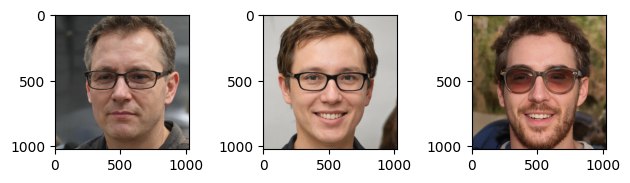


Class no_glasses


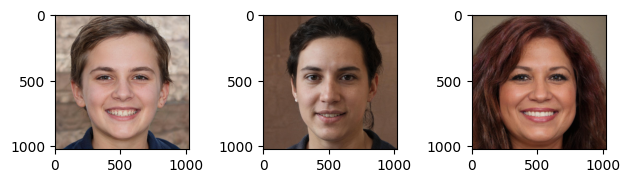

In [28]:
print("Memnampilkan data Training")
random_number = random.randint(0, 1721)
for kelas in os.listdir(train_dir):
    path_kelas = os.path.join(train_dir, kelas) # Folder Train
    print(f"\nClass {kelas}")
    fig, axs = plt.subplots(1, 3)
    axs[0].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number])) # mengambil gambar pada folder
    )
    axs[1].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number+2]))
    )
    axs[2].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number+4]))
    )
    fig.tight_layout()
    plt.show()

### Menampilkan data pada class validation

Menampilkan Data Validasi

Class glasses


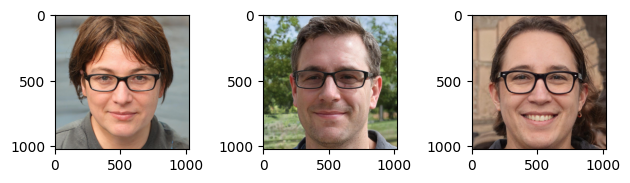


Class no_glasses


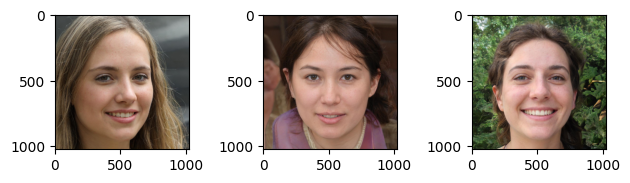

In [29]:
print("Menampilkan Data Validasi")
random_number = random.randint(0, 430)
for kelas in os.listdir(val_dir):
    path_kelas = os.path.join(val_dir, kelas) # Folder val
    print(f"\nClass {kelas}")
    fig, axs = plt.subplots(1, 3)
    axs[0].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number])) # mengambil gambar pada folder
    )
    axs[1].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number+2]))
    )
    axs[2].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number+4]))
    )
    fig.tight_layout()
    plt.show()